In [7]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import torchvision.datasets as datasets
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader

import sys
sys.path.append('./python_files/')
from model_trainer import ModelTrainer
from utils import *
from data_loader import load_data, generate_dataset_g
from nn_models import LeNet
import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
torch.__version__

'0.4.1'

In [3]:
train_input, train_target, test_input, test_target = load_data(cifar=False, normalize=True, flatten=False, full=False)
train_target = train_target.long()
test_target = test_target.long()

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples


In [4]:
len(train_input)

1000

5


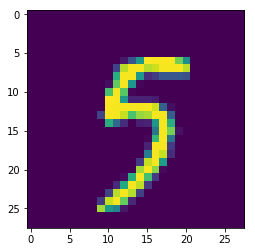

In [5]:
i = 420
plt.imshow(train_input[i, 0, :, :])
print(train_target[i].item())

## 1) LeNet with disjoint trainset and testset

In [9]:
train_dataset = (train_input, train_target)
test_dataset = (test_input, test_target)

in_channels = train_input.shape[1]
out_channels = 10

In [10]:
#debug_layers_dims(LeNet_gen(), train_input.shape)

In [11]:
target_classes = np.array(train_target.tolist())
unique, counts = np.unique(target_classes, return_counts=True)

print(dict(zip(unique, counts)))
crossEntropyClassesWeigths = Tensor(counts/len(target_classes))

{0: 97, 1: 116, 2: 99, 3: 93, 4: 105, 5: 92, 6: 94, 7: 117, 8: 87, 9: 100}


******************************** Train log ************************************
                     train loss       train acc        val loss         val acc
0                       0.00230           0.074         0.00228           0.101
10                      0.00210           0.435         0.00211           0.403
20                      0.00168           0.594         0.00170           0.554
30                      0.00101           0.776         0.00109           0.739
39                      0.00081           0.807         0.00093           0.712
*******************************************************************************


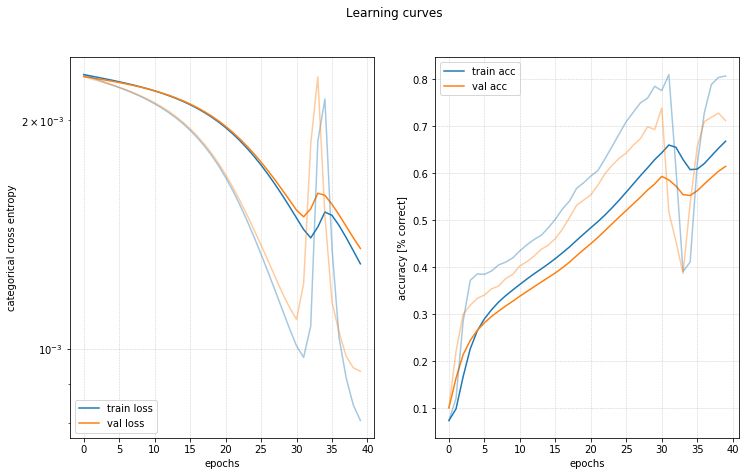

In [13]:
crit_fun = lambda input_, target : (input_, target)
y_hat_fun = lambda y: y.argmax(1)

net = LeNet()
loss_fun = nn.CrossEntropyLoss(weight=crossEntropyClassesWeigths)
learning_rate = 0.05

mt = ModelTrainer(net, loss_fun, optim.SGD(net.parameters(), lr=learning_rate), y_hat_fun, crit_fun)
hist = mt.fit(train_dataset, test_dataset, epochs=40, batch_size=1000, verbose=10)
mt.plot_training("Learning curves")

## 2) Testing with a fraction of data from trainset (10%)

In [16]:
g_train, g_test = generate_dataset_g(net, train_dataset, test_dataset, [net.conv2], ['conv 2'])

In [19]:
g_test[0].shape

torch.Size([600, 1024])

In [114]:
target_classes = np.array(biased_dataset[1].tolist())
unique, counts = np.unique(target_classes, return_counts=True)

print(dict(zip(unique, counts)))
crossEntropyClassesWeigths = Tensor(counts/len(target_classes))

{0: 85, 1: 121, 2: 110, 3: 112, 4: 108, 5: 95, 6: 80, 7: 105, 8: 86, 9: 98}


In [ ]:
crit_fun = lambda input_, target : (input_, target)
y_hat_fun = lambda y: y.argmax(1)

LeNet = LeNet_gen()
loss_fun = nn.CrossEntropyLoss(weight=crossEntropyClassesWeigths)
learning_rate = 0.1

mt = ModelTrainer(LeNet, loss_fun, optim.SGD(LeNet.parameters(), lr=learning_rate), y_hat_fun, crit_fun)
hist = mt.fit(train_dataset, biased_dataset, epochs=40, batch_size=100, verbose=10)
mt.plot_training("Learning curves")

In [ ]:
## 3) Hooks definition to get layers activations

In [13]:
activation_output = dict()